# Upload tables

In [1]:
# Open all annotation files:
# original duplicated regions, sliding non-overlapping windows, shuffled intervals

import pandas as pd
import numpy as np
import sys
sys.path.insert(1, '../modules')
from modules_repeats import *

filenames = ["out_df_ws_jumps-250.csv","out_df_ws_jumps-200.csv","out_df_ws_jumps-150.csv",
"out_df_ws_jumps-100.csv","out_df_ws_jumps-50.csv","out_df_ws_jumps.csv",
"out_df_ws_jumps50.csv","out_df_ws_jumps100.csv","out_df_ws_jumps150.csv",
"out_df_ws_jumps200.csv","out_df_ws_jumps250.csv","out_df_ws_jumps300.csv",
"out_df_ws_jumps350.csv","out_df_ws_jumps400.csv","out_df_ws_jumps450.csv",
"out_df_ws_jumps500.csv","out_df_ws_jumps550.csv","out_df_ws_jumps600.csv",
"out_df_ws_jumps650.csv","out_df_ws_jumps700.csv","out_df_ws_jumps750.csv",
"out_df_ws_jumps800.csv","out_df_ws_jumps850.csv","out_df_ws_jumps900.csv",
"out_df_ws_jumps950.csv","out_df_ws_jumps1000.csv","out_df_ws_jumps1050.csv",
"out_df_ws_jumps1100.csv","out_df_ws_jumps1150.csv","out_df_ws_jumps1200.csv",
"out_df_ws_jumps1250.csv","out_df_ws_jumps1300.csv","out_df_ws_jumps1350.csv",
"out_df_ws_jumps1400.csv","out_df_ws_jumps1450.csv","out_df_ws_jumps1500.csv"]

filenames_shuff = ["out_df_shuff_1.csv", "out_df_shuff_2.csv", "out_df_shuff_3.csv",
"out_df_shuff_4.csv", "out_df_shuff_5.csv", "out_df_shuff_6.csv", "out_df_shuff_7.csv",
"out_df_shuff_8.csv", "out_df_shuff_9.csv", "out_df_shuff_10.csv"]

dirs = "outputs/annotated/"

pieces = []
for f in filenames:
    pieces.append(pd.read_csv(f"../{dirs}/{f}"))

for f in filenames_shuff:
    pieces.append(pd.read_csv(f"../{dirs}/{f}"))
    
piece_out = pd.read_csv(f"../{dirs}/out_df_ws_jumps.csv")

for p in pieces:
    p = l_and_r_2_both(p)
    
piece_out = l_and_r_2_both(piece_out)

In [2]:
import importlib
import modules_repeats
importlib.reload(modules_repeats)
from modules_repeats import *

In [3]:
pd.set_option('display.max_columns', None)
piece_out

,chr,coor_s,coor_e,ids,length,centro,telo,gaps,genes,intra_frac,cpgisl_in,cpgisl_bor,ctcf,repli_in,repli_bor,repli_bor_deriv,repli_deriv,recomb_in,recomb_bor,dnase_in,dnase_bor,CG_frac_in,jumps,DNA,LINE,LTR,SINE,Low_complexity,Retroposon,Satellite,Simple_repeat,rRNA,snRNA,scRNA,srpRNA,tRNA,RC,L1,L2,MIR,Alu,Real_satellite,CG_frac,telocent_dist
0,1,10000,207666,id1,197666,121818793,0,2,6,0.206,3,0,0,23.697,21.098,0.0,31.000,1.306,1.306,18.837,39.412,0.443708,2.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.00,0
1,1,257666,297956,id2,40290,121728503,247666,2,0,0.208,0,0,0,29.531,21.098,0.0,13.000,1.306,1.306,29.449,39.412,0.391412,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.25,247666
2,1,347968,535988,id3,188020,121490471,337968,2,1,0.229,3,0,0,20.982,21.098,0.0,3.885,1.306,1.306,31.596,39.412,0.429874,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,337968
3,1,585988,817292,id4,231304,121209167,575988,1,2,0.255,3,0,0,20.347,28.000,28.0,43.000,1.306,1.306,370.261,39.412,0.428337,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.21,575988
4,1,817367,821400,id5,4033,121205059,807367,0,1,0.000,0,0,0,29.000,28.500,29.0,2.000,1.306,1.306,14.195,6.290,0.509794,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.45,807367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6651,22,48911634,48912886,id4359,1252,33857316,1895582,0,0,1.000,0,0,0,3.000,3.000,3.0,3.885,2.425,2.425,9.797,9.110,0.467252,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.47,1895582
6652,22,49383944,49385910,id4360,1966,34329626,1422558,0,0,1.000,0,0,0,2.000,2.000,2.0,3.885,2.425,2.425,6.030,6.030,0.392675,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.44,1422558
6653,22,49386637,49388496,id4361,1859,34332319,1419972,0,0,1.000,0,0,0,2.000,2.000,2.0,3.885,2.425,2.425,31.596,39.412,0.398063,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.34,1419972
6654,22,50432257,50442552,id4362,10295,35377939,365916,0,1,1.000,2,0,0,1.545,1.500,2.0,1.000,1.306,1.306,10.048,39.412,0.648082,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.60,365916


In [4]:
print(np.sum(piece_out.iloc[:, 23:42], axis=0))

DNA                391
LINE              2612
LTR               1154
SINE              2626
Low_complexity     128
Retroposon          58
Satellite          193
Simple_repeat      945
rRNA                 7
snRNA               10
scRNA                0
srpRNA               3
tRNA                 1
RC                   0
L1                2308
L2                 258
MIR                301
Alu               2323
Real_satellite      91
dtype: int64


# Repeats at breakpoints

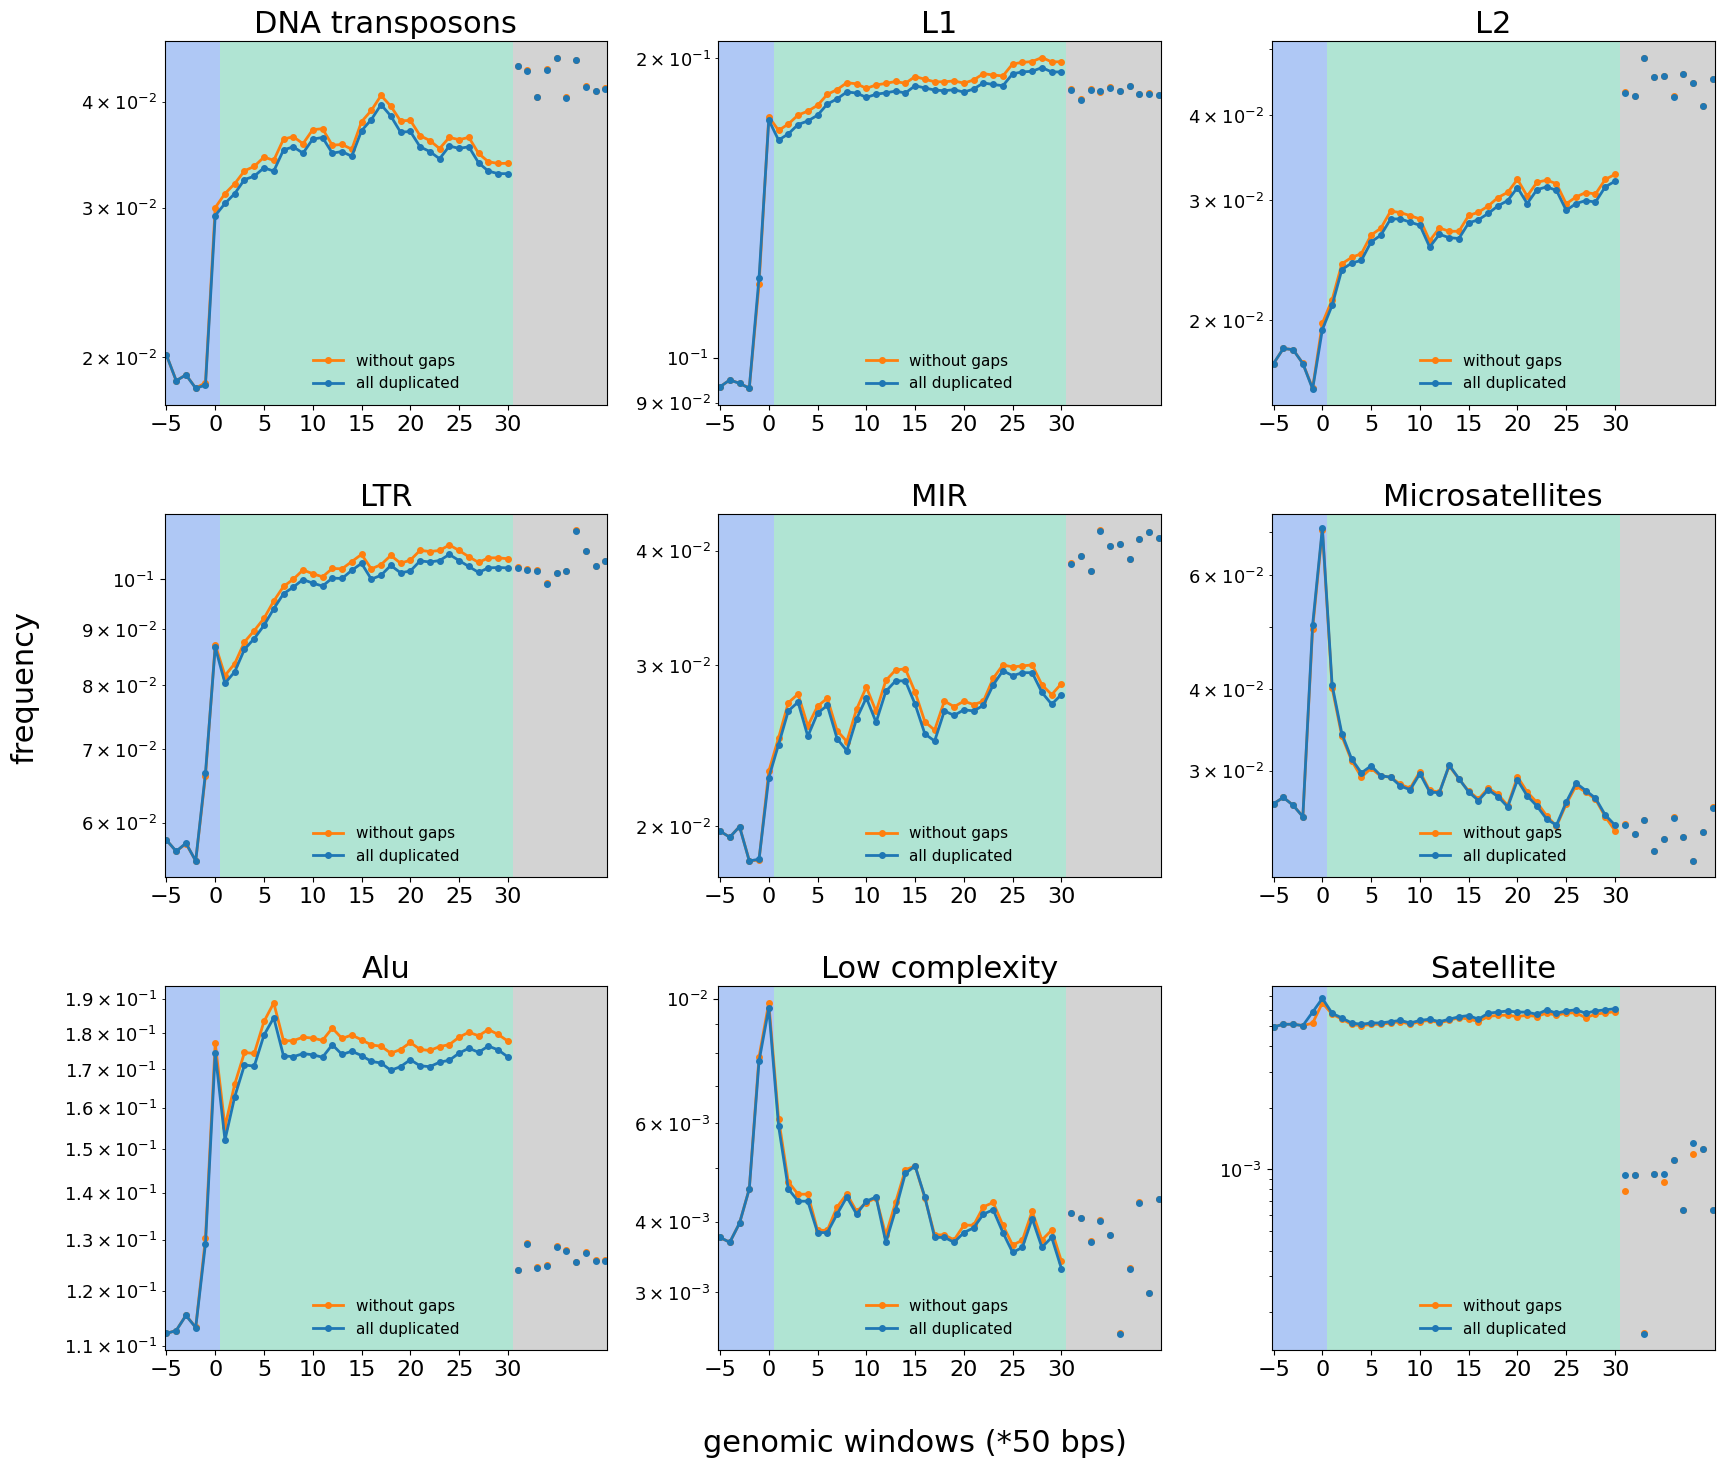

In [6]:
import matplotlib.pyplot as plt


titles = ["DNA transposons", "L1", "L2", "LTR", "MIR", 
          "Microsatellites", "Alu", "Low complexity", "Satellite"]
plot_several_repeats(pieces, ["DNA", "L1", "L2", "LTR", "MIR",
            "Simple_repeat", "Alu", "Low_complexity", "Real_satellite"], titles, (3,3), (20,17), 0.025);

# Predicting features affecting duplication rates

In [29]:
# ~36% of variance in duplications number is explained by genomic features.

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

X, y = np.array(piece_out.loc[:, ~piece_out.columns.isin(['chr', 'coor_s', 'coor_e', 'ids', 'length', 'jumps'])], float), np.array(piece_out["jumps"], float)
clf = RandomForestRegressor(max_depth=5, n_estimators=100, oob_score=True)

for n in range(3):
    strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=n)
    cv_results = cross_val_score(clf, X, y, cv=strat_k_fold)
    print("Mean:", np.mean(cv_results))


Mean: 0.3665503556403076
Mean: 0.35729949952021595
Mean: 0.3746531485542032


In [52]:
# Long run, change permutation number.
# Try more perms; it takes 15 mins per sample per 100 permutations.

significant_association_with_jumps(piece_out, perm=30)

All columns: ['length' 'centro' 'telo' 'gaps' 'genes' 'intra_frac' 'cpgisl_in'
 'cpgisl_bor' 'ctcf' 'repli_in' 'repli_bor' 'repli_bor_deriv'
 'repli_deriv' 'recomb_in' 'recomb_bor' 'dnase_in' 'dnase_bor' 'DNA'
 'LINE' 'LTR' 'SINE' 'Low_complexity' 'Retroposon' 'Satellite'
 'Simple_repeat' 'rRNA' 'snRNA' 'scRNA' 'srpRNA' 'tRNA' 'RC' 'L1' 'L2'
 'MIR' 'Alu' 'Real_satellite' 'CG_frac' 'telocent_dist']
Significant: ['length' 'genes' 'intra_frac' 'cpgisl_in' 'repli_deriv']
Corresponding p-adjusted (BH): [0. 0. 0. 0. 0.]


In [152]:
#piece_out.insert(0, 'jumps', piece_out.pop('jumps'))
#piece_out.loc[:, ~piece_out.columns.isin(['chr', 'coor_s', 'coor_e', 'ids'])].corr(method='spearman')

In [150]:
# Spearman correlation between "jumps" and every single column

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from pingouin import partial_corr

df_in = piece_out.loc[:, ~piece_out.columns.isin(['chr', 'coor_s', 'coor_e', 'ids'])]
df_in = df_in.drop(['telocent_dist', 'Retroposon', 'scRNA', 'RC', 'snRNA', 'srpRNA', 'tRNA', 'rRNA', 'LINE', 'SINE', 'Satellite'], axis=1)
cols = list(df_in.columns)
cols.remove("jumps")

for i, val in enumerate(cols):
    cor = partial_corr(data=df_in, x='jumps', y=val, method='spearman')
    ci = cor.std.__str__().split()[11:13]
    ci = [float(i.strip("[],")) for i in ci]
    pvas_adj = cor['p-val'][0]
    print(f"{val}: r={round(cor.r[0], 3)}, p_adj={round(pvas_adj, 3)}, ci_delta={round(ci[1] - cor.r[0], 3)}, {'signif.' if pvas_adj < 0.01/len(cols) else ''}")


length: r=0.308, p_adj=0.0, ci_delta=0.022, signif.
centro: r=-0.099, p_adj=0.0, ci_delta=0.019, signif.
telo: r=0.023, p_adj=0.062, ci_delta=0.027, 
gaps: r=0.199, p_adj=0.0, ci_delta=0.021, signif.
genes: r=0.109, p_adj=0.0, ci_delta=0.021, signif.
intra_frac: r=-0.167, p_adj=0.0, ci_delta=0.027, signif.
cpgisl_in: r=0.27, p_adj=0.0, ci_delta=0.02, signif.
cpgisl_bor: r=-0.01, p_adj=0.393, ci_delta=0.02, 
ctcf: r=-0.016, p_adj=0.183, ci_delta=0.026, 
repli_in: r=0.023, p_adj=0.066, ci_delta=0.027, 
repli_bor: r=0.031, p_adj=0.013, ci_delta=0.019, 
repli_bor_deriv: r=-0.018, p_adj=0.143, ci_delta=0.028, 
repli_deriv: r=0.145, p_adj=0.0, ci_delta=0.025, signif.
recomb_in: r=-0.039, p_adj=0.001, ci_delta=0.019, 
recomb_bor: r=-0.039, p_adj=0.001, ci_delta=0.019, 
dnase_in: r=0.032, p_adj=0.008, ci_delta=0.028, 
dnase_bor: r=0.022, p_adj=0.068, ci_delta=0.028, 
CG_frac_in: r=0.026, p_adj=0.037, ci_delta=0.024, 
DNA: r=-0.012, p_adj=0.345, ci_delta=0.022, 
LTR: r=0.027, p_adj=0.027, ci_de

In [58]:
piece_out.shape

(6656, 44)

In [66]:
import numpy as np
import scipy.stats as stats

def corr_ci(r, n, alpha=0.05):
    """
    Calculate the confidence interval for a correlation coefficient using Fisher's z-transformation.
    
    Parameters:
    - r: Correlation coefficient (e.g., Pearson or Spearman)
    - n: Number of observations
    - alpha: Significance level (default is 0.05 for a 95% confidence interval)
    
    Returns:
    - (lower_bound, upper_bound): Confidence interval for the correlation coefficient
    """
    # Handle the special case where r = 1 or r = -1 (perfect correlation)
    if r == 1.0 or r == -1.0:
        return r, r

    # Step 2: Fisher z-transformation
    z = np.arctanh(r)  # equivalent to 0.5 * np.log((1 + r) / (1 - r))
    
    # Step 3: Calculate the standard error
    se = 1 / np.sqrt(n - 3)
    
    # Step 4: Calculate the z critical value for the confidence level
    z_critical = stats.norm.ppf(1 - alpha / 2)
    
    # Confidence interval in z-space
    z_lower = z - z_critical * se
    z_upper = z + z_critical * se
    
    # Step 5: Convert back to the correlation scale
    lower_bound = np.tanh(z_lower)
    upper_bound = np.tanh(z_upper)
    
    return r - lower_bound, upper_bound - r

# Example usage
r = -0.099  # Example correlation coefficient
n = 6656   # Number of observations
alpha = 0.05  # 95% confidence interval

lower, upper = corr_ci(r, n, alpha)
print(f"Correlation Coefficient: {r}")
print(f"95% Confidence Interval: [{lower:.3f}, {upper:.3f}]")

Correlation Coefficient: -0.099
95% Confidence Interval: [0.024, 0.024]


In [70]:
# Partial correlation between "jumps" and every single column given all other

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from pingouin import partial_corr

df_in = piece_out.loc[:, ~piece_out.columns.isin(['chr', 'coor_s', 'coor_e', 'ids'])]
df_in = df_in.drop(['telocent_dist', 'Retroposon', 'scRNA', 'RC', 'snRNA', 'srpRNA', 'tRNA', 'rRNA', 'LINE', 'SINE', 'Satellite'], axis=1)
cols = list(df_in.columns)
cols.remove("jumps")

for i, val in enumerate(cols):
    other = cols[:i] + cols[i+1:]
    cor = partial_corr(data=df_in, x='jumps', y=val, covar=other, method='spearman')
    ci = cor.std.__str__().split()[11:13]
    ci = [float(i.strip("[],")) for i in ci]
    pvas_adj = cor['p-val'][0]
    print(f"{val}: r={round(cor.r[0], 3)}, p_adj={round(pvas_adj, 3)}, ci_delta={round(ci[1] - cor.r[0], 3)}, {'signif.' if pvas_adj < 0.01/len(cols) else ''}")


length: r=0.197, p_adj=0.0, ci_delta=0.023, signif.
centro: r=-0.017, p_adj=0.162, ci_delta=0.027, 
telo: r=0.017, p_adj=0.161, ci_delta=0.023, 
gaps: r=0.081, p_adj=0.0, ci_delta=0.019, signif.
genes: r=0.019, p_adj=0.131, ci_delta=0.021, 
intra_frac: r=-0.195, p_adj=0.0, ci_delta=0.025, signif.
cpgisl_in: r=0.139, p_adj=0.0, ci_delta=0.021, signif.
cpgisl_bor: r=-0.056, p_adj=0.0, ci_delta=0.026, signif.
ctcf: r=-0.003, p_adj=0.778, ci_delta=0.023, 
repli_in: r=-0.027, p_adj=0.026, ci_delta=0.027, 
repli_bor: r=0.025, p_adj=0.04, ci_delta=0.025, 
repli_bor_deriv: r=0.019, p_adj=0.127, ci_delta=0.021, 
repli_deriv: r=0.059, p_adj=0.0, ci_delta=0.021, signif.
recomb_in: r=-0.014, p_adj=0.242, ci_delta=0.024, 
recomb_bor: r=0.014, p_adj=0.256, ci_delta=0.026, 
dnase_in: r=-0.024, p_adj=0.049, ci_delta=0.024, 
dnase_bor: r=0.019, p_adj=0.114, ci_delta=0.021, 
CG_frac_in: r=0.035, p_adj=0.004, ci_delta=0.025, 
DNA: r=-0.001, p_adj=0.928, ci_delta=0.021, 
LTR: r=0.016, p_adj=0.196, ci_delt

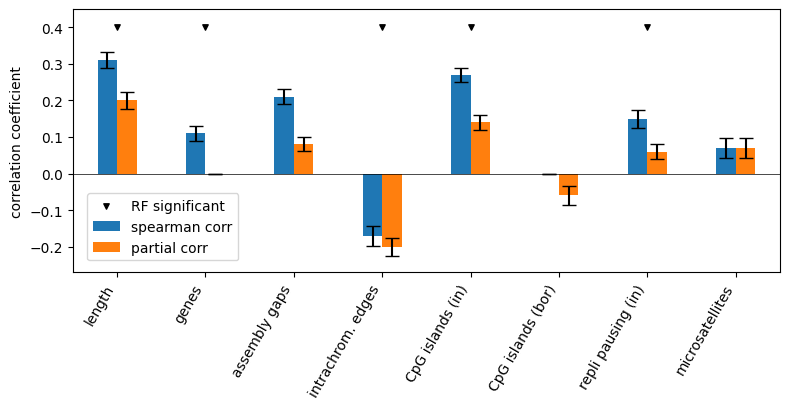

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

group1_means = [0.31, 0.11, 0.21, -0.17, 0.27, 0.0, 0.15, 0.07]
group2_means = [0.2, 0.0, 0.08, -0.2, 0.14, -0.06, 0.06, 0.07]
group1_std = [0.022, 0.021, 0.021, 0.027, 0.02, 0.0, 0.025, 0.027]
group2_std = [0.023, 0.0, 0.019, 0.025, 0.021, 0.026, 0.021, 0.027]

labels = ['length', 'genes', 'assembly gaps', 'intrachrom. edges', 'CpG islands (in)', 'CpG islands (bor)', 'repli pausing (in)', "microsatellites"]

fig, ax = plt.subplots(figsize=(8, 4.2))

x = np.arange(len(labels))
width = 0.22

bars1 = ax.bar(x - width/2, group1_means, yerr=group1_std, capsize=5, color="tab:blue", width=width, label='spearman corr')
bars2 = ax.bar(x + width/2, group2_means, yerr=group2_std, capsize=5, color="tab:orange", width=width, label='partial corr')

ax.set_xticks(x)
ax.set_xticklabels(labels)

imp_indices = [0, 1, 3, 4, 6]
ax.scatter(x[imp_indices], [0.4]*len(imp_indices), marker="v", color='k', label="RF significant", s=15)  
plt.ylabel("correlation coefficient", fontsize=10)
ax.hlines(y=0.0, xmin=-0.5, xmax=9, color='black', linewidth=0.5)

ax.set_ylim([-0.27, 0.45])
ax.set_xlim([-0.5, 7.5])
ax.legend(loc=[0.02, 0.045])
ax.set_xticklabels(labels, rotation=60, fontsize=10, ha="right")
plt.tight_layout();

# Enrichment at SD breakpoints

gaps, (sign. more): 0.018780048076923076 0.0014719941317565544
genes, (sign. more): 0.7484975961538461 0.6832398441848239
cpgisl_in, (sign. more): 0.38686899038461536 0.24897376947413824
cpgisl_bor, (sign. more): 0.022310697115384616 0.010217891315610312
ctcf, NOTHING
repli_in, (sign. more): 20.982453725961538 16.92194625592594
repli_bor, (sign. more): 10.549169546274037 8.460242785892675
repli_bor_deriv, (sign. more): 9.9873046875 8.214567461657508
repli_deriv, (sign. more): 3.884957932692307 3.397479555489703
recomb_in, NOTHING
recomb_bor, NOTHING
dnase_in, NOTHING
dnase_bor, (sign. more): 19.70603102463942 19.543624459653508
CG_frac_in, (sign. more): 0.43849797736712254 0.41066400174988654
CG_frac, (sign. less): 0.39762824025350013 0.40658540038343954
DNA, (sign. less): 0.029371995192307692 0.03699030472604714
LINE, (sign. less): 0.19621394230769232 0.2258693493462437
LTR, (sign. less): 0.08668870192307693 0.092961468864525
SINE, (sign. more): 0.197265625 0.17511405073569591
Low_com

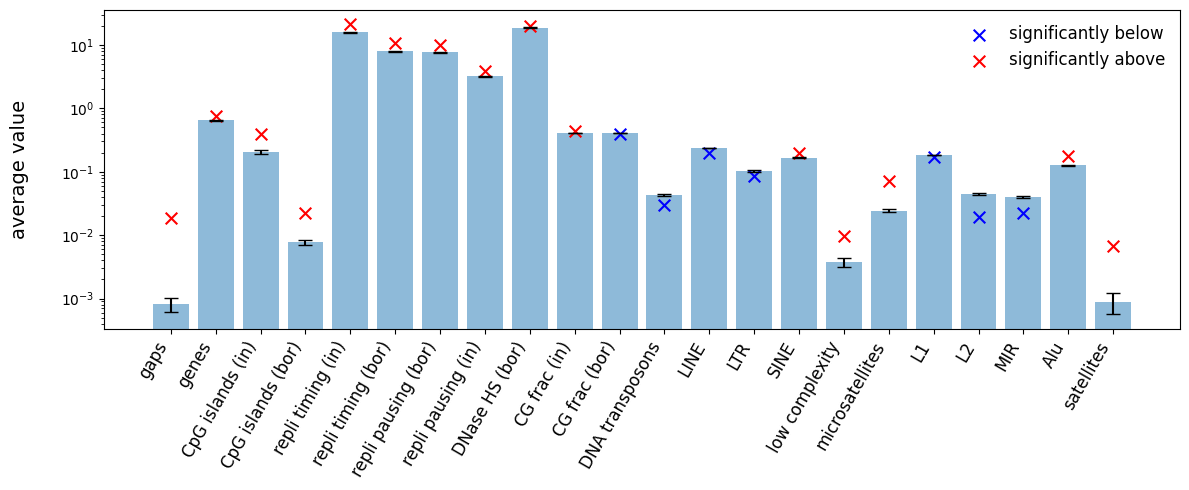

In [57]:
# Plot enrichment of genomic features in/flanking duplicated regions
# We compare distributions of duplicated regions with random genomic intevals

import matplotlib.pyplot as plt

ms, stds, vals, labels, colors = breakpoints_enrichment(piece_out, pieces)

x_pos = np.array(range(len(ms)))
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(x_pos, ms, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=5, width=0.8)
ax.scatter(x_pos[colors == "b"], vals[colors == "b"], color="b", marker="x", s=70)
ax.scatter(x_pos[colors == "r"], vals[colors == "r"], color="r", marker="x", s=70)
ax.set_yscale('log')
ax.set_xticks(x_pos)

indices_change = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 16, 21]
new_labels = ["CpG islands (in)", "CpG islands (bor)", "repli timing (in)", "repli timing (bor)",
              "repli pausing (bor)", "repli pausing (in)", "DNase HS (bor)",
              "CG frac (in)", "CG frac (bor)", "DNA transposons", 
              "low complexity", "microsatellites", "satellites"]

for i in range(len(indices_change)):
    labels[indices_change[i]] = new_labels[i]

#plt.ylabel("average value", fontsize=14)
ax.set_ylabel("average value", labelpad=23, fontsize=14)
ax.set_xticklabels(labels, rotation=60, fontsize=12, ha="right")
ax.legend(['significantly below', 'significantly above'], frameon=False, fontsize=12);
plt.tight_layout();
plt.savefig("../pics/break_features.pdf")

gaps, (sign. more): 0.018780048076923076 0.0014719941317565544
genes, (sign. more): 0.7484975961538461 0.6832398441848239
cpgisl_in, (sign. more): 0.38686899038461536 0.24897376947413824
cpgisl_bor, (sign. more): 0.022310697115384616 0.010217891315610312
ctcf, NOTHING
repli_in, (sign. more): 20.982453725961538 16.92194625592594
repli_bor, (sign. more): 10.549169546274037 8.460242785892675
repli_bor_deriv, (sign. more): 9.9873046875 8.214567461657508
repli_deriv, (sign. more): 3.884957932692307 3.397479555489703
recomb_in, NOTHING
recomb_bor, NOTHING
dnase_in, NOTHING
dnase_bor, (sign. more): 19.70603102463942 19.543624459653508
CG_frac_in, (sign. more): 0.43849797736712254 0.41066400174988654
CG_frac, (sign. less): 0.39762824025350013 0.40658540038343954
DNA, (sign. less): 0.029371995192307692 0.03699030472604714
LINE, (sign. less): 0.19621394230769232 0.2258693493462437
LTR, (sign. less): 0.08668870192307693 0.092961468864525
SINE, (sign. more): 0.197265625 0.17511405073569591
Low_com

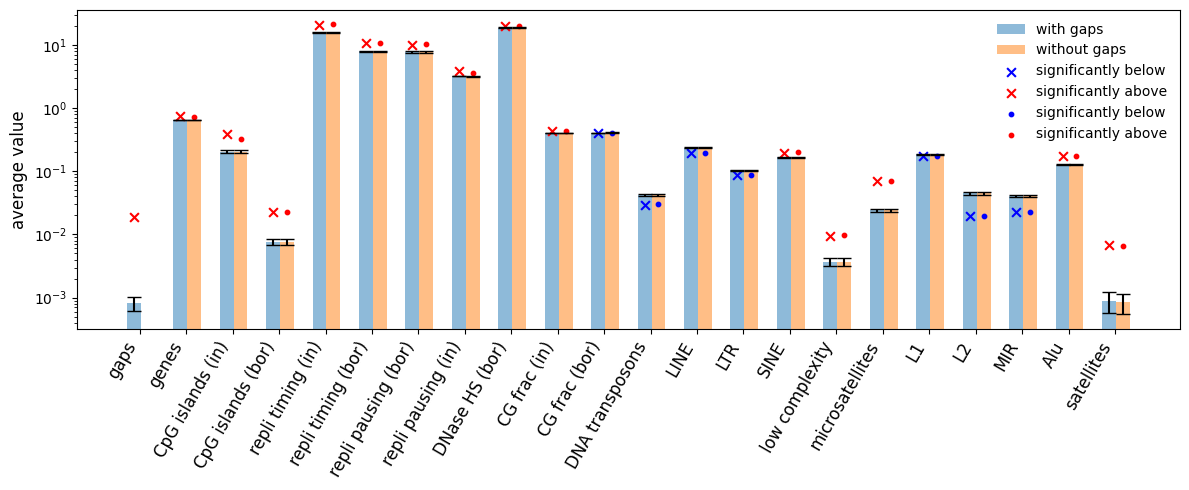

In [48]:
# Plot enrichment of genomic features in/flanking duplicated regions
# We compare all duplicated regions with those without any assembly gaps at flanks 

import matplotlib.pyplot as plt

ms, stds, vals, labels, colors = breakpoints_enrichment(piece_out, pieces)

x_pos = np.array(range(len(ms)))
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(x_pos, ms, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=5, width=0.3, label = "with gaps")
ax.scatter(x_pos[colors == "b"], vals[colors == "b"], color="b", marker="x", s=40, label = 'significantly below')
ax.scatter(x_pos[colors == "r"], vals[colors == "r"], color="r", marker="x", s=40, label = 'significantly above')

ms, stds, vals, labels, colors = breakpoints_enrichment(piece_out, pieces, mode="nogaps")

x_pos = np.array(range(len(ms))) + 0.3
ax.bar(x_pos, ms, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=5, width=0.3, label = "without gaps")
ax.scatter(x_pos[colors == "b"], vals[colors == "b"], color="b", marker=".", s=40, label = 'significantly below')
ax.scatter(x_pos[colors == "r"], vals[colors == "r"], color="r", marker=".", s=40, label = 'significantly above')
ax.set_yscale('log')
ax.set_xticks(x_pos - 0.17)

indices_change = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 16, 21]
new_labels = ["CpG islands (in)", "CpG islands (bor)", "repli timing (in)", "repli timing (bor)",
              "repli pausing (bor)", "repli pausing (in)", "DNase HS (bor)",
              "CG frac (in)", "CG frac (bor)", "DNA transposons", 
              "low complexity", "microsatellites", "satellites"]

for i in range(len(indices_change)):
    labels[indices_change[i]] = new_labels[i]

handles, legends = ax.get_legend_handles_labels()
order = [4, 5, 0, 1, 2, 3]

plt.ylabel("average value", fontsize=12)
ax.set_xticklabels(labels, rotation=60, fontsize=12, ha="right")
ax.legend([handles[idx] for idx in order], [legends[idx] for idx in order], frameon=False, fontsize=10);
plt.tight_layout();

In [97]:
# only 3% of duplicated regions are flanked with assembly gaps

from collections import Counter

Counter(piece_out["gaps"])

Counter({0: 6465, 1: 132, 2: 59})